# Exploratory Data Analysis Starter

## Import packages

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [29]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [30]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [31]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [32]:
print('price_data',price_df.shape)
print('client_data',client_df.shape)


price_data (193002, 8)
client_data (14606, 26)


In [33]:
unique_ids = client_df['id'].nunique()
print(f"Number of unique IDs: {unique_ids}")
#there are no repeating columns-each row is unique to its customer record

Number of unique IDs: 14606


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [34]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [35]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [36]:
# Ensure the 'date' column is in datetime format

client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], errors='coerce')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], errors='coerce')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'], errors='coerce')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'], errors='coerce')

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [37]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [38]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [39]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

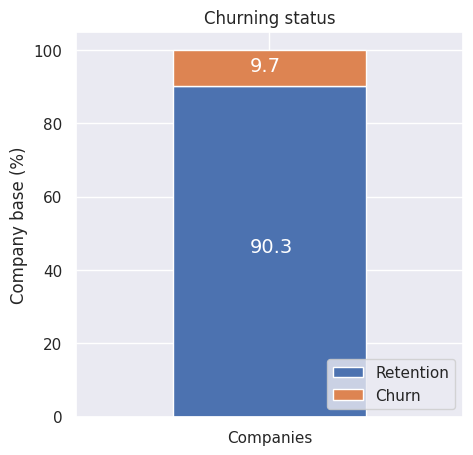

In [40]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

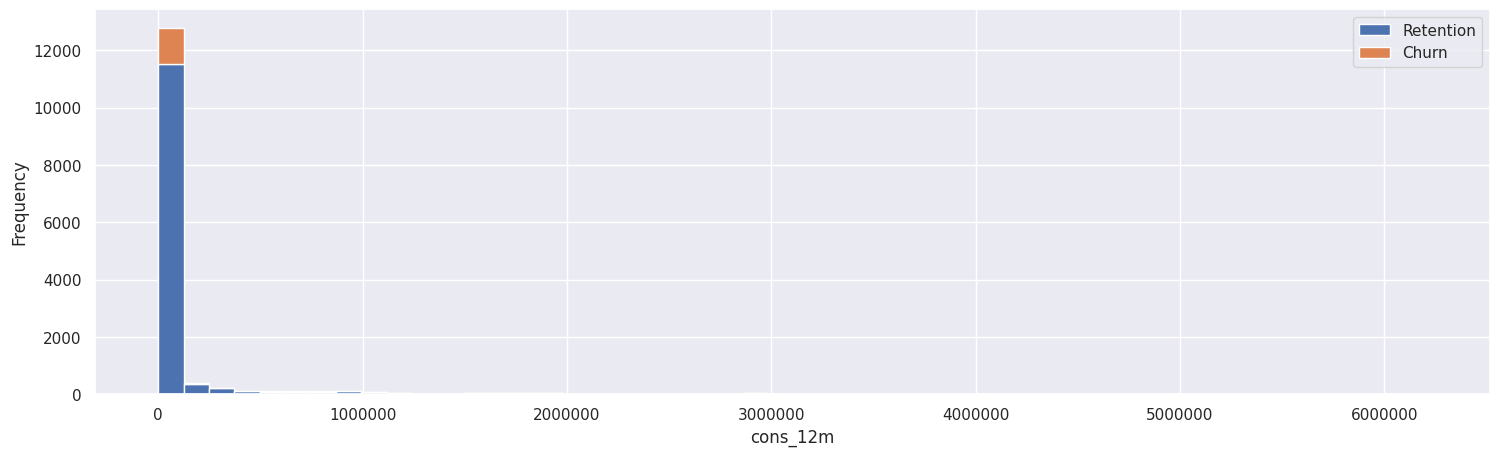

In [41]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [42]:
churned_client=client_df[client_df['churn']==True]
churned_client.shape

(1419, 26)

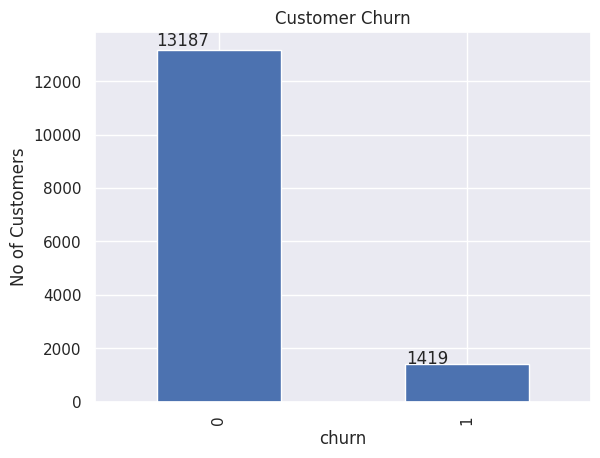

In [43]:
ax = client_df.churn.value_counts().plot(kind='bar')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

# Show the plot
plt.title("Customer Churn")
plt.ylabel('No of Customers')
plt.show()

#There is a data imbalance but it is expected as in churn data not of customers who leave are lesser generall.

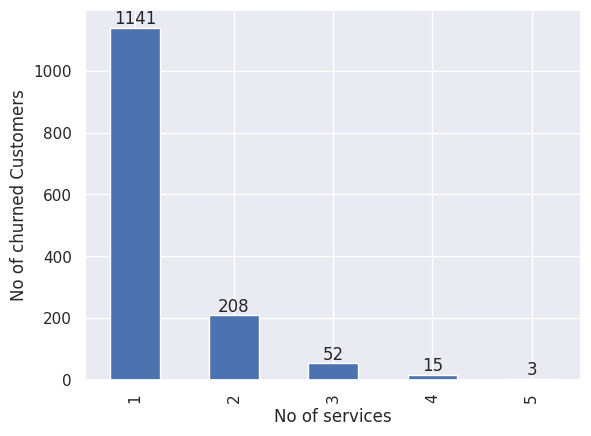

In [44]:

import matplotlib.pyplot as plt

# Filter for churned customers and count their number of active products
filtered_df = client_df[client_df['churn'] == 1]
counts = filtered_df['nb_prod_act'].value_counts()

# Plot the bar chart
ax = counts.plot(kind='bar')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom')

# Show the plot
plt.xlabel('No of services')
plt.ylabel('No of churned Customers')
plt.show()


In [45]:
churned_client['channel_sales'].value_counts()
#customers coming from foosdfpfkusacimwkcsosbicdxkicaua sales channel are having a significant impact on the churn.\
# We can focus on this channel and fix this and reflect the solution on other channels

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    820
MISSING                             283
usilxuppasemubllopkaafesmlibmsdf    138
lmkebamcaaclubfxadlmueccxoimlema    103
ewpakwlliwisiwduibdlfmalxowmwpci     75
Name: count, dtype: int64

In [46]:
#no of customers churned who are also gas clients
churned_gas_clients = client_df[(client_df['churn'] == 1) & (client_df['has_gas'] =='t')]

# Get the number of such customers
num_churned_gas_clients = churned_gas_clients.shape[0]

# Display the result
print(f"Number of churned customers who are also gas clients: {num_churned_gas_clients}")


#gas has not affected the churn my much,it is primarily electricitya

Number of churned customers who are also gas clients: 217


In [47]:
channel_1=churned_client[churned_client['channel_sales']=='ewpakwlliwisiwduibdlfmalxowmwpci']

In [48]:
channel_1

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
440,f0463afebee8a4d05854a5790d2f3c6b,ewpakwlliwisiwduibdlfmalxowmwpci,26173,0,0,2012-05-28,2016-07-07,2015-07-07,2015-04-14,4021.30,...,f,0.00,29.76,29.76,2,329.76,4,ldkssxwpmemidmecebumciepifcamkci,13.200,1
542,8c9f6d30949240da9b68e90eed027bba,ewpakwlliwisiwduibdlfmalxowmwpci,297859,0,29603,2012-11-15,2016-03-22,2012-11-15,2015-03-23,866.34,...,f,155.10,33.06,33.06,1,83.64,3,ldkssxwpmemidmecebumciepifcamkci,14.490,1
646,2af2b93dce7fd047e29ddbffbf10b92f,ewpakwlliwisiwduibdlfmalxowmwpci,15257,0,5626,2010-09-09,2016-03-17,2010-09-09,2015-03-18,1996.45,...,f,770.75,28.45,28.45,1,155.33,5,lxidpiddsbxsbosboudacockeimpuepw,13.856,1
1010,d3b5297e5580ecaf1e31044f5cdcf3c2,ewpakwlliwisiwduibdlfmalxowmwpci,18497,0,1524,2011-03-01,2016-02-27,2011-03-01,2015-03-09,1874.32,...,f,153.85,36.36,36.36,1,185.92,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,24.250,1
1183,4c61ba19603e513486f1a5353cb59ebb,ewpakwlliwisiwduibdlfmalxowmwpci,13685,0,0,2010-10-13,2016-10-13,2010-10-13,2015-10-14,550.56,...,f,0.00,18.08,18.08,1,53.22,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,10.350,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12892,b548ca9a4ae2b32c857573fbc9d703ed,ewpakwlliwisiwduibdlfmalxowmwpci,54791,18201,6641,2013-02-19,2016-02-18,2014-06-26,2015-02-26,4245.02,...,t,674.19,49.44,49.44,2,502.30,3,lxidpiddsbxsbosboudacockeimpuepw,33.000,1
13069,968fb911368fc589e3e343cad9ff2aad,ewpakwlliwisiwduibdlfmalxowmwpci,9243,271738,1072,2012-05-17,2016-05-17,2012-05-17,2015-05-23,924.98,...,t,106.75,35.85,35.85,2,102.99,4,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,1
13705,b5327c91c04f246acc772b55deff9f97,ewpakwlliwisiwduibdlfmalxowmwpci,12200,0,937,2010-09-30,2016-09-30,2015-08-26,2015-10-01,1220.73,...,f,90.06,47.86,47.86,1,135.05,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,26.400,1
13977,7fdc674efe1ac1008ff401a569fa5e2d,ewpakwlliwisiwduibdlfmalxowmwpci,6794,0,0,2012-10-10,2016-10-09,2012-10-10,2015-10-11,717.92,...,f,0.00,40.44,40.44,1,105.65,3,lxidpiddsbxsbosboudacockeimpuepw,16.200,1


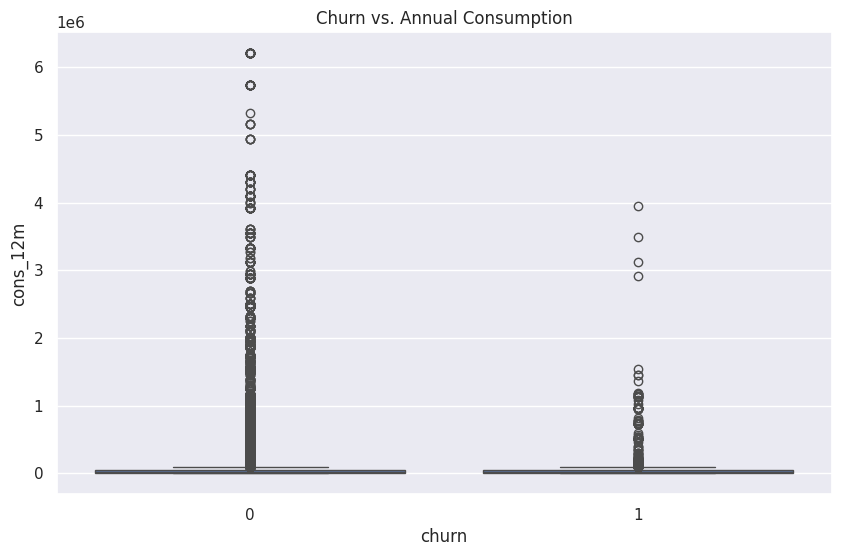

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='cons_12m', data=client_df)
plt.title('Churn vs. Annual Consumption')
plt.show()


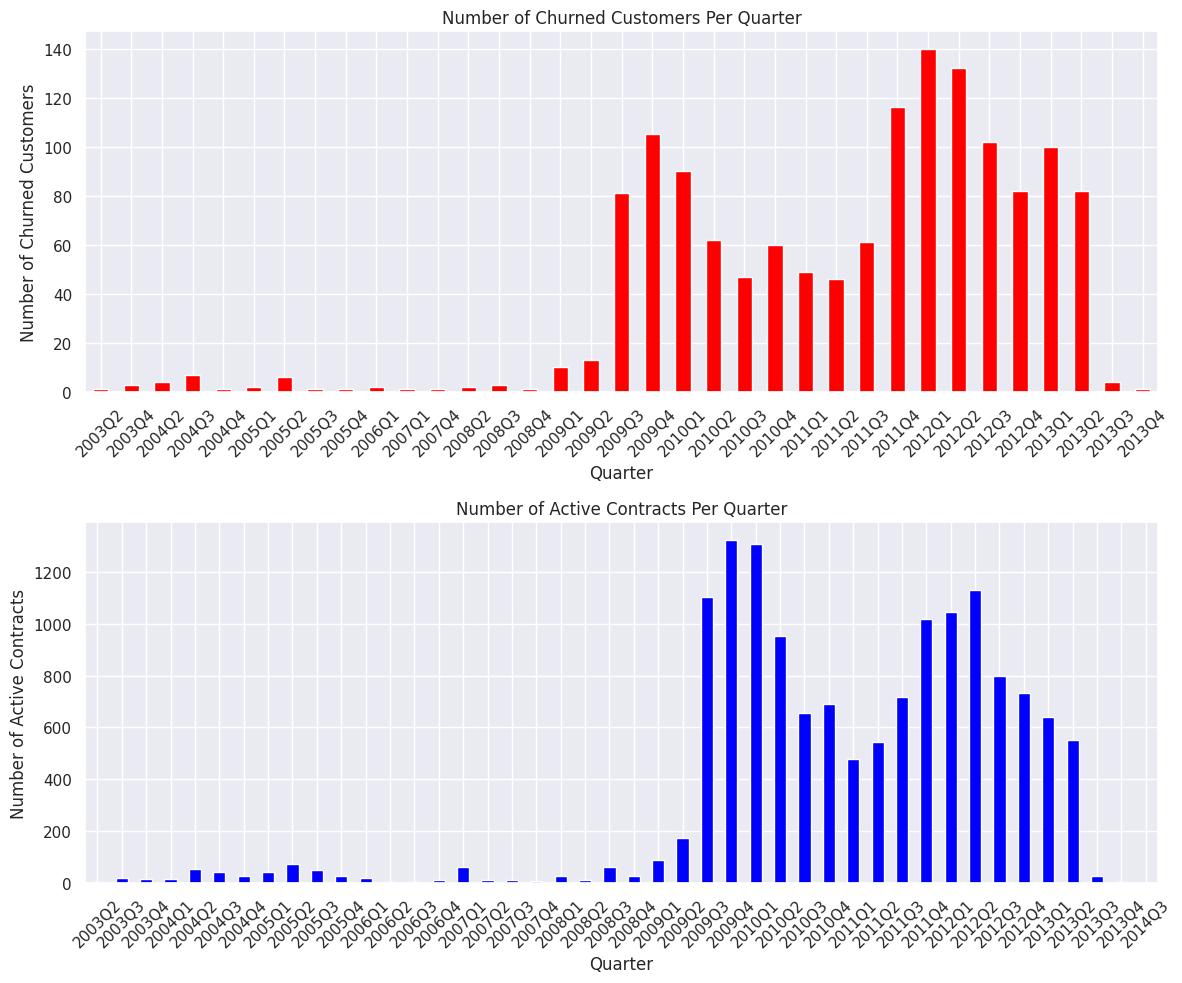

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert dates to datetime format, ensuring proper format for all dates
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], errors='coerce')

# Filter for churned customers
churned_client = client_df[client_df['churn'] == 1]

# Extract the quarter from the date_activ column for both churned and all customers
client_df['quarter'] = client_df['date_activ'].dt.to_period('Q')

# Count the number of churned customers per quarter
churned_per_quarter = churned_client.groupby('quarter').size()

# Count the number of active contracts per quarter (total number of customers who activated contracts in each quarter)
active_per_quarter = client_df.groupby('quarter').size()

# Plot the two graphs in separate subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot churned customers in the first subplot
churned_per_quarter.plot(kind='bar', color='red', ax=ax1)
ax1.set_title('Number of Churned Customers Per Quarter')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Number of Churned Customers')
ax1.set_xticklabels(churned_per_quarter.index, rotation=45)

# Plot active contracts in the second subplot
active_per_quarter.plot(kind='bar', color='blue', ax=ax2)
ax2.set_title('Number of Active Contracts Per Quarter')
ax2.set_xlabel('Quarter')
ax2.set_ylabel('Number of Active Contracts')
ax2.set_xticklabels(active_per_quarter.index, rotation=45)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
#merging data
# Merge client_df with price_data on 'id'
merged_df = client_df.merge(price_df, on='id', how='left')

# Display the merged DataFrame
merged_df.head()

# Check for null values in the merged dataset
null_counts = merged_df.isnull().sum()

# Display columns with null values and their counts
print(null_counts[null_counts > 0])
merged_unique_ids = merged_df['id'].nunique()
print(f"Number of unique IDs: {merged_unique_ids}")
merged_df.shape[0]-merged_unique_ids
#Merging data has caused repetitions

